In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage


In [2]:


# Load the binary image and binarize it if needed
image = cv2.imread('circles1.png', cv2.IMREAD_GRAYSCALE)
binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Label the connected components in the binary image
labeled_image = measure.label(binary)

# Compute the properties of the labeled regions
properties = measure.regionprops(labeled_image)

#I can find the center of mass by getting the average x/y-coord of all the px with the same label
# Loop through the properties and find the centroid or center of mass of each labeled region
centroids = []
for prop in properties:
    centroid = ndimage.measurements.center_of_mass(binary, labeled_image, prop.label)
    print(f"Centroid of connected component {prop.label}: {centroid}")
    print(type(centroid), centroid[0])
    centroids.append(centroid)

Centroid of connected component 1: (136.15980450236967, 154.84873617693523)
<class 'tuple'> 136.15980450236967
Centroid of connected component 2: (106.72377358490566, 360.17735849056606)
<class 'tuple'> 106.72377358490566
Centroid of connected component 3: (207.18471231968164, 322.38749792737525)
<class 'tuple'> 207.18471231968164
Centroid of connected component 4: (296.7518649757553, 154.24748228273032)
<class 'tuple'> 296.7518649757553
Centroid of connected component 5: (364.0390777647519, 627.0109417741305)
<class 'tuple'> 364.0390777647519
Centroid of connected component 6: (386.4467758444217, 67.22287615148413)
<class 'tuple'> 386.4467758444217


C:\Users\Carl Küschall\AppData\Local\Temp\ipykernel_14240\4169449551.py:15: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  centroid = ndimage.measurements.center_of_mass(binary, labeled_image, prop.label)


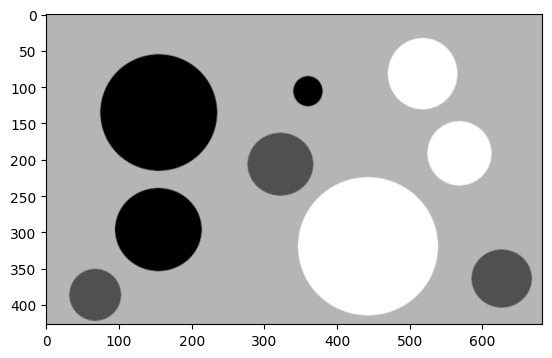

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
for cent in centroids:
    print(cent)
    print(cent[0].astype('int'), cent[1].astype('int'))
    image[cent[0].astype('int')][cent[1].astype('int')] = 255

(136.15980450236967, 154.84873617693523)
136 154
(106.72377358490566, 360.17735849056606)
106 360
(207.18471231968164, 322.38749792737525)
207 322
(296.7518649757553, 154.24748228273032)
296 154
(364.0390777647519, 627.0109417741305)
364 627
(386.4467758444217, 67.22287615148413)
386 67


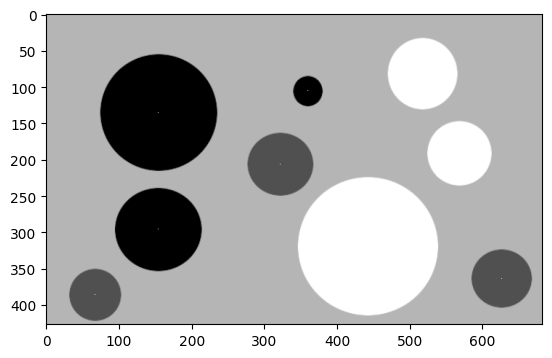

In [5]:
plt.imshow(image, cmap='gray')